<a href="https://colab.research.google.com/github/Preeti-sahani/LGMVIP-DataScience/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**LetsGrowMore Data Science Internship (VIP)**
**Preeti Sahani**

**Batch: September**

**Title: Stock Market Prediction And Forecasting Using Stacked LSTM**

Predicting stock price using historical data of a company, using LSTM.

This project includes python programs to show Keras LSTM can be used to predict future stock prices for a company using it's historical stock price data. You can also find sample programs on how to fine tune Hyperprameters of LSTM (or any Neural Network for that matter).

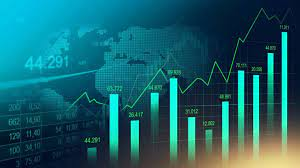

#**1. Importing the Libraries**

In [9]:
import math
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

#**2. Loading Dataset**

In [10]:
stock_data = pd.read_csv("/content/NSE-TATAGLOBAL.csv")
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Checking the null value in dataset

In [20]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

#Plotting close price


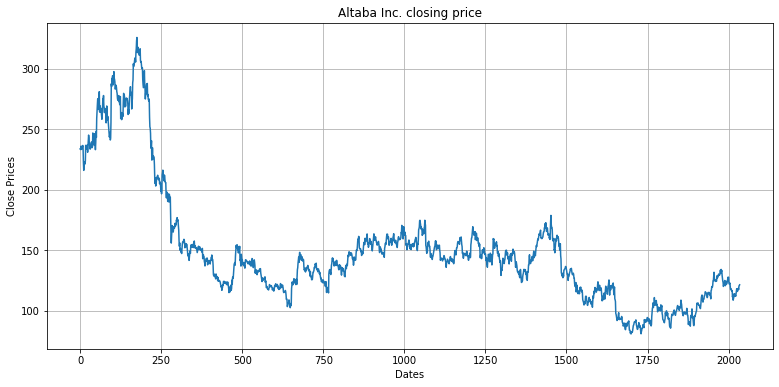

In [11]:
plt.figure(figsize=(13,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

The Open column is the starting price while the Close column is the final price of a stock on a particular trading day. The High and Low columns represent the highest and lowest prices for a certain day.

 

In [12]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


#**3. Feature Scaling**


**Splitting the data into traina and test set**


In [13]:
train_set = stock_data.iloc[:500, 1:2].values
test_set = stock_data.iloc[500:, 1:2].values

In [14]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set = sc.fit_transform(train_set)

#**4. Creating Data with Timesteps**


In [15]:
X_train = []
y_train = []
for i in range(60, 500):
    X_train.append(train_set[i-60:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#**5. Building the LSTM**
 
In order to build the LSTM, we need to import a couple of modules from Keras:

1) Sequential for initializing the neural network.

2) Dense for adding a densely connected neural network layer.

3) LSTM for adding the Long Short-Term Memory layer.

4) Dropout for adding dropout layers that prevent overfitting.


In [16]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 50))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
14/14 [==============================] - 8s 126ms/step - loss: 0.1772
Epoch 2/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0606
Epoch 3/100
14/14 [==============================] - 2s 131ms/step - loss: 0.0304
Epoch 4/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0237
Epoch 5/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0191
Epoch 6/100
14/14 [==============================] - 2s 126ms/step - loss: 0.0200
Epoch 7/100
14/14 [==============================] - 2s 122ms/step - loss: 0.0163
Epoch 8/100
14/14 [==============================] - 2s 129ms/step - loss: 0.0139
Epoch 9/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0135
Epoch 10/100
14/14 [==============================] - 2s 125ms/step - loss: 0.0134
Epoch 11/100
14/14 [==============================] - 2s 124ms/step - loss: 0.0122
Epoch 12/100
14/14 [==============================] - 2s 127ms/step - loss: 0.0129
Epoch 13/100


#**6. Make Predictions using the test set**

In [17]:
# Getting the predicted stock price of 2017
dataset_train = stock_data.iloc[:500, 1:2]
dataset_test = stock_data.iloc[500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(459, 60, 1)


#**7. Visualizing the results**

Visualize the predicted stock prices with original stock prices.



In [18]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

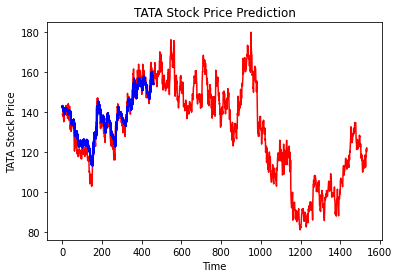

In [19]:
plt.plot(test_set, color = 'red', label = 'Test TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
#plt.legend()
plt.show()

**Conclusion**

From the plot we can see that the test stock price went up while our model also predicted that the price of the stock will go up. This clearly shows how powerful LSTMs are for analyzing time series and sequential data.